[View in Colaboratory](https://colab.research.google.com/github/hasbrain/deeplearning-path/blob/master/LogisticRegression/%5BTutorial%5DLogistic_Regression_with_Iris_data.ipynb)

# Simple Logistic Regression with sklearn library

This notebook is written by [hasBrain](https://github.com/hasbrain), following the tutorial of [Saishruthi Swaminathan](https://github.com/SSaishruthi)

## Data processing

Import required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Read CSV data from the internet, this data includes 150 flowers of 3 kinds with 4 properties for each flower. Our target is matching flower's properties to the kind

In [36]:
df = sns.load_dataset("iris")

Show sample data

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Print a concise summary of a DataFrame.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Removing all null values row

In [41]:
df = df.dropna(subset=['petal_width'])
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Plot the data

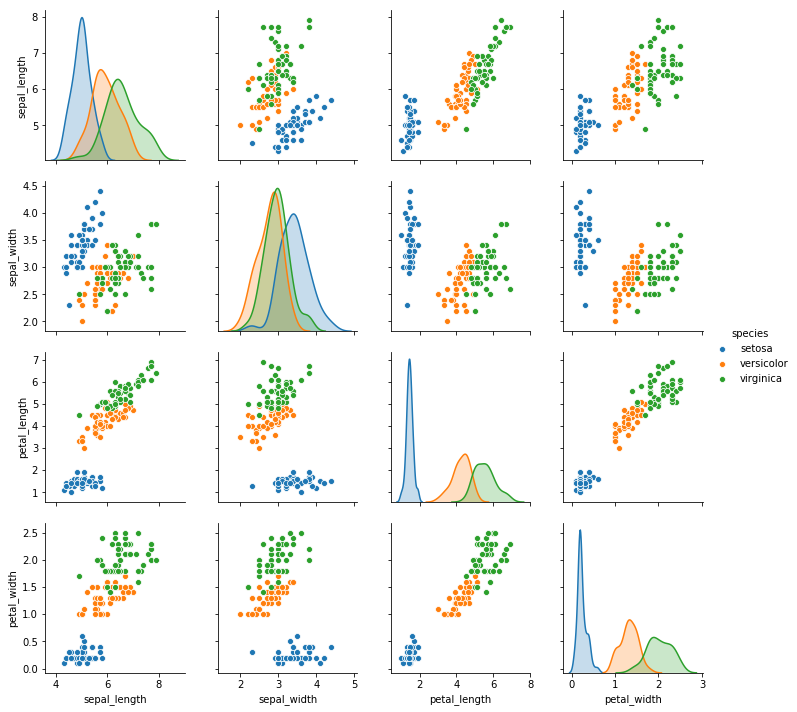

In [42]:
sns.pairplot(df, hue='species', height=2.5)

From the plots it can be observed that there is some abnormality in the class name. Let's explore further

In [43]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# Simple Logistic Regression

Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [44]:
final_df = df[df['species'] != 'virginica']

In [45]:
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Outlier Check

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


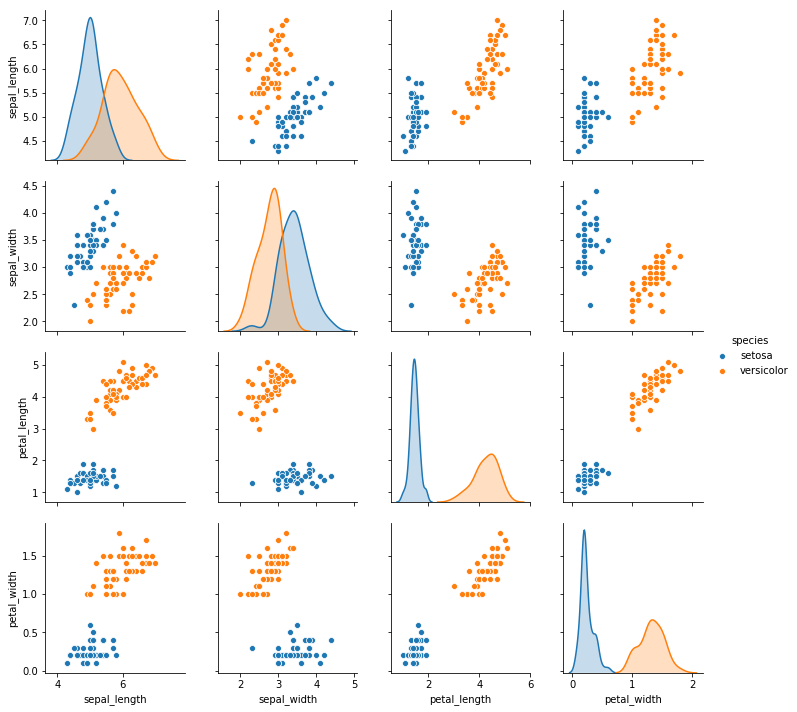

In [46]:
sns.pairplot(final_df, hue='species', size=2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

SEPAL LENGTH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114fb4f98>]],
      dtype=object)

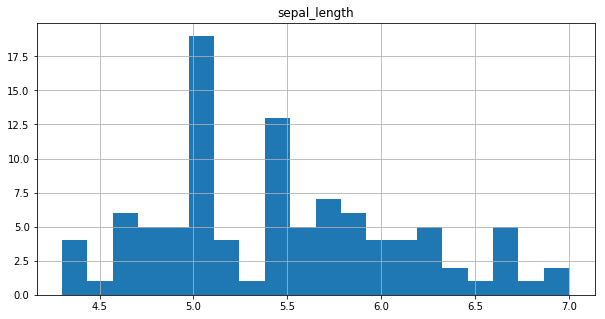

In [47]:
final_df.hist(column = 'sepal_length',bins=20, figsize=(10,5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

/Users/admin/projects/vietai/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116fa2eb8>]],
      dtype=object)

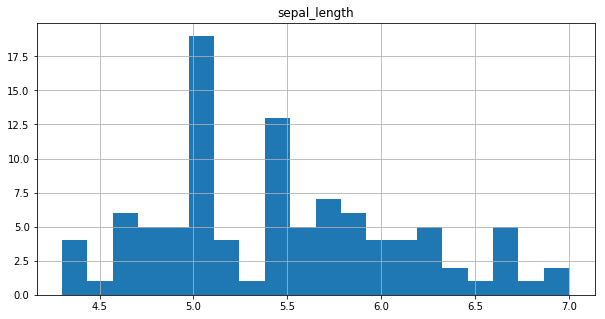

In [50]:
final_df.loc[final_df.sepal_length < 1, ['sepal_length']] = final_df['sepal_length']*100
final_df.hist(column = 'sepal_length',bins=20, figsize=(10,5))

SEPAL WIDTH

In [51]:
final_df = final_df.drop(final_df[(final_df['species'] == "setosa") & (final_df['sepal_width'] < 2.5)].index)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


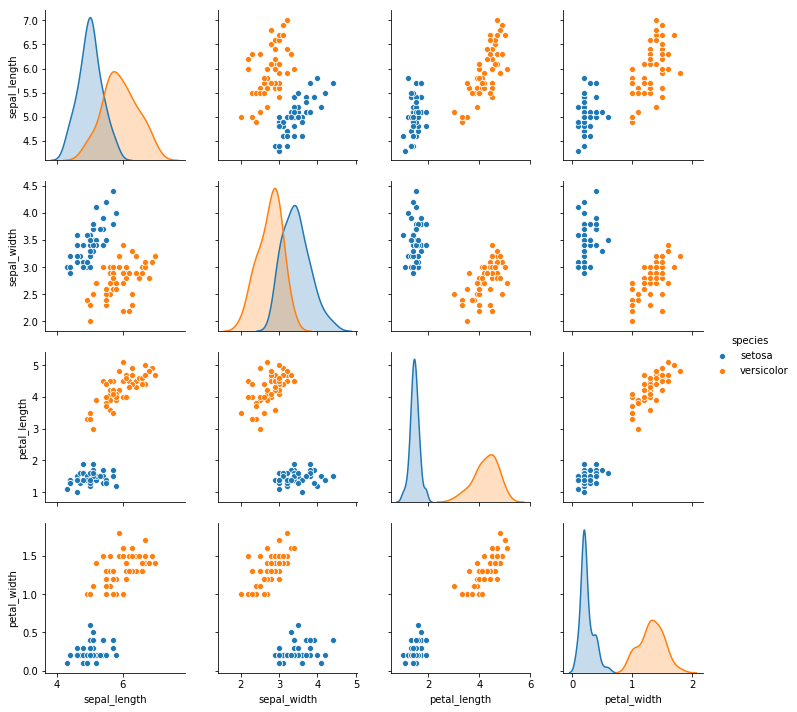

In [52]:
sns.pairplot(final_df, hue='species', size=2.5)

Successfully removed outliers!!

# Label Encoding

In [53]:
final_df['species'].replace(["setosa","versicolor"], [1,0], inplace=True)

In [54]:
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [55]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [56]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

In [57]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (79, 4)
Output Shape (20, 4)


In [58]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [59]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [60]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [61]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [62]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [63]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[-0.13667461  0.14245458 -0.18444716 -0.18313216]]
Optimized intercept -0.012020854861412139
Training Accuracy 1.0
Test Accuracy 1.0


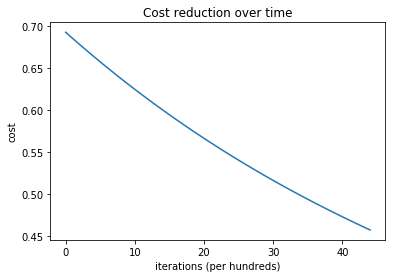

In [64]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression()

In [67]:
clf.fit(X_tr_arr, y_tr_arr)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
print (clf.intercept_, clf.coef_)

[-0.15839312] [[-0.76515385  1.17915889 -1.39632085 -1.41662861]]


In [69]:
pred = clf.predict(X_ts_arr)

In [70]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0
